<a href="https://colab.research.google.com/github/dushyantmaharshi/Linear-Regression-Implementation-Car-Dekho-Dataset-/blob/main/Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [101]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Car dekho project/self project/CAR DETAILS FROM CAR DEKHO.csv')

In [6]:
dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [8]:
dataset.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [9]:
# duplicate
len(dataset[dataset.duplicated()])
dataset.drop_duplicates(keep='first', inplace=True)

In [10]:
dataset.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

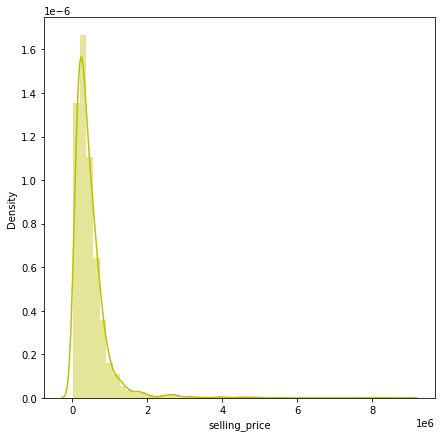

In [11]:
# Dependent variable 'Selling Price'
plt.figure(figsize=(7,7))
sns.distplot(dataset['selling_price'],color="y")

From se above graph we can see as our price in  10^6 so it our graph is movig towards to y axis and we couldn't get any better visualziation with these type of graph.
<br>So,It better to take log of the dependent variable to draw the graph.

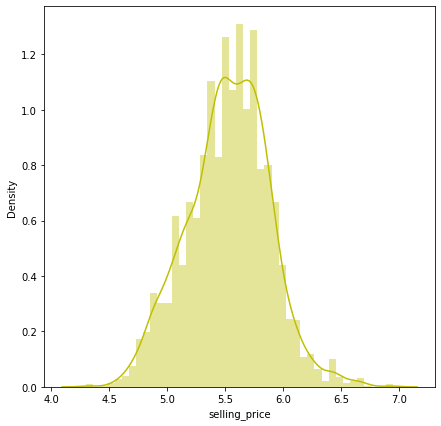

In [12]:
# Dependent variable 'Selling Price'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(dataset['selling_price']),color="y")

In [13]:
numeric_features = dataset.describe().columns
numeric_features

Index(['year', 'selling_price', 'km_driven'], dtype='object')

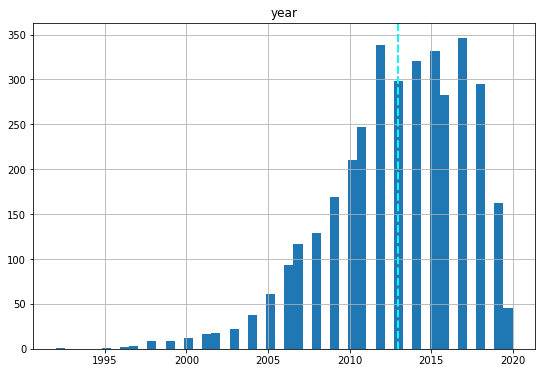

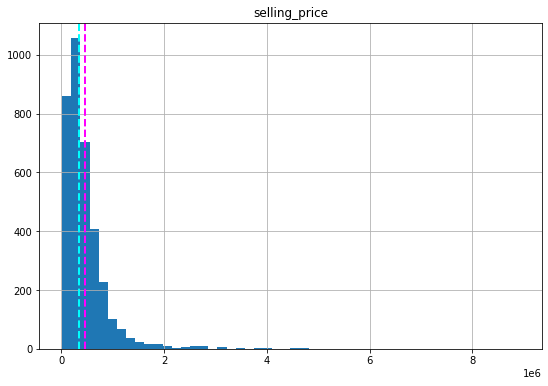

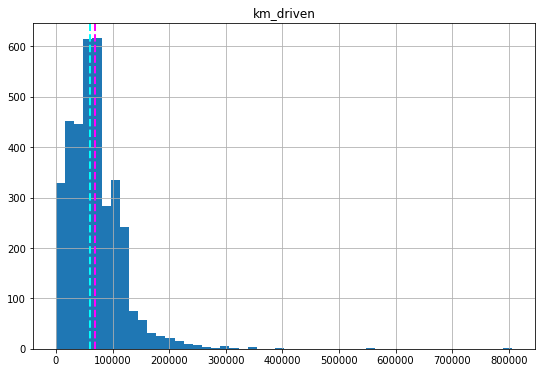

In [14]:
# plot a bar plot for each numerical feature count (except car_ID)
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

From above it's clear that our numeric data is right as well as left skewed for some columns..
<br> Let's try to make it noraml distribution..by tranforming the data into some other form..and then visualize the thing..

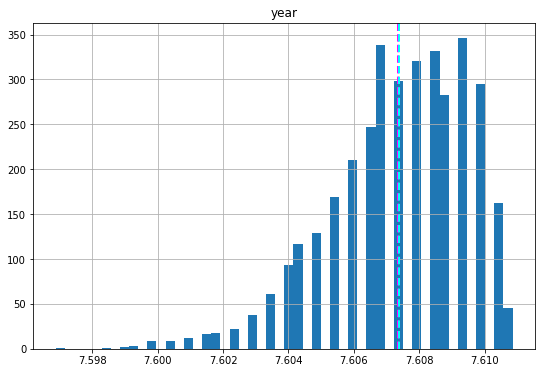

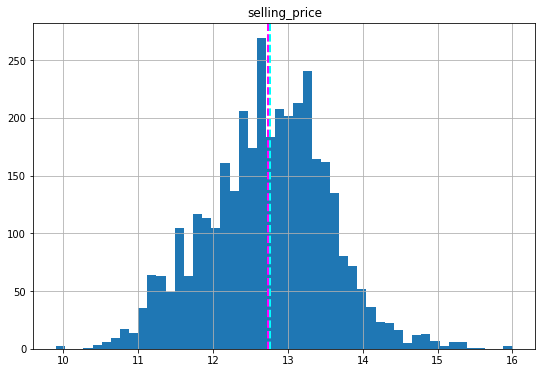

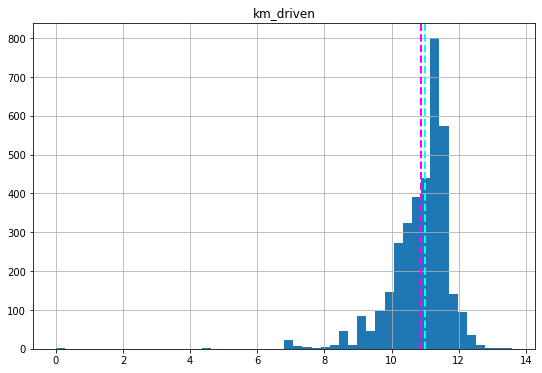

In [15]:
#applying log transformation 
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log(dataset[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

Now, we can visualize what the relationship between them...
<br>**Let's try to plot some scatter** plot between independent with the dependent variable and figure out how they behaves or what they have relationship....

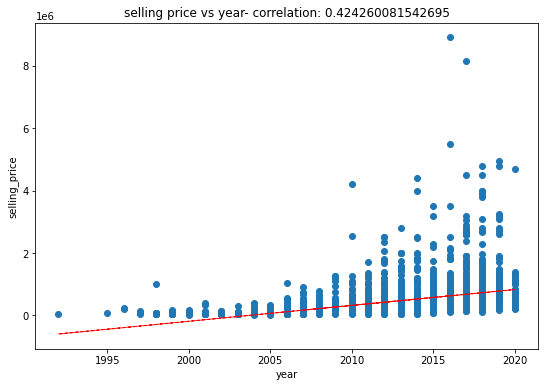

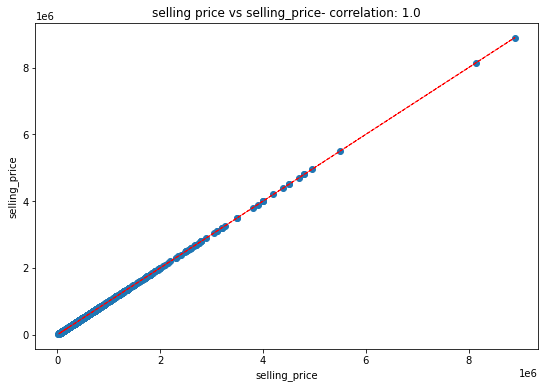

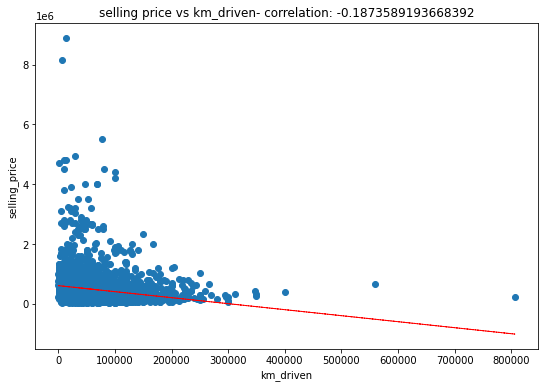

In [16]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['selling_price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('selling_price')
    ax.set_title('selling price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['selling_price'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

From above we can see most of the car have driven less the 200000 km and we take that one as boundry condition and make them as an outlier.
<br> And for the Year column we can keep the data for last 15 year from which we can make a good model.

### **Let's try to remove outlier(Unwanted or Extra which makes our dataset quiet unwell) from our dataset.**

---
Let's keep the data only for last 15 year that is between 2005 to 2020. and KM_driven is less then 200000.

In [17]:
dataset=dataset[dataset['year'] >= 2005]

In [18]:
dataset=dataset[dataset['km_driven'] <= 200000]

In [19]:
dataset.reset_index(inplace=True)

In [20]:
dataset.head()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


Let's Draw one more time scatter plot between dependent and all the indendent variable...

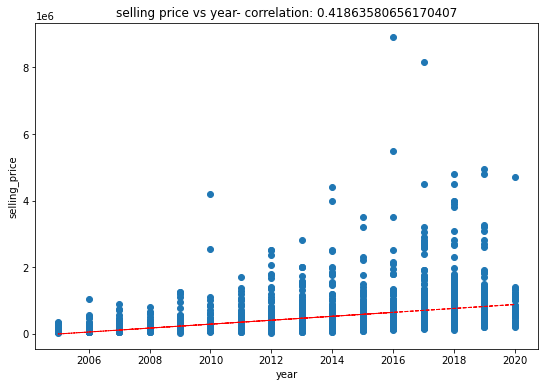

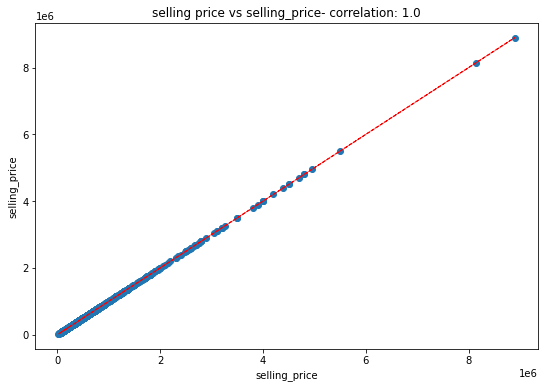

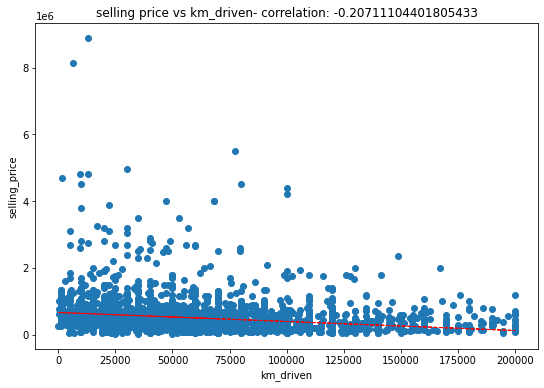

In [21]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['selling_price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('selling_price')
    ax.set_title('selling price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['selling_price'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

After removing outlier we are getting our scatter plot in a quiet well manner now we can find out the relation between them..
<br>Here we cay say that..
* If the KM_driven is less then price will be high for the car.
* If the car is too old then it will be relativily cheap then latest one.

Let's try to  find and remove the multicollinearity from our dataset and also find some correlation between numerical data.
<br> we can also use some feature engineering to create someother variable with existing one to get more understanding the data.

In [22]:
# calculating car age 
dataset['Car Age']= 2020 - dataset['year']

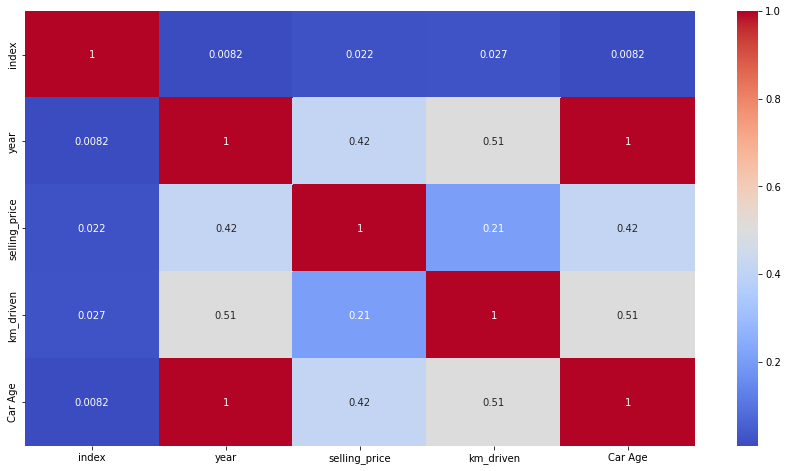

In [23]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [24]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [25]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['year','selling_price']]])

,variables,VIF
0,index,2.432067
1,km_driven,4.625989
2,Car Age,4.702584


We are getting VIF is 4.065 that is good to perform our linear regression.

In [26]:
numerical_features = ['km_driven','Car Age']

In [27]:
dataset.head()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Car Age
0,0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13
1,1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13
2,2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8
3,3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3
4,4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6


In [28]:
dataset['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [29]:
dataset['company'] = dataset['name'].str.split(" ", expand=True)[0]
dataset['company'] = dataset['company'].replace({'toyouta': 'Toyota','vw':'Volkswagen','vokswagen':'Volkswagen',
                                                      'maxda':'Mazda','porcshce':'Porsche','Bmw' : 'BMW','Mg' : 'MG'})
dataset['company'] = dataset['company'].str.title()
dataset['company'].value_counts()

Maruti           993
Hyundai          614
Mahindra         300
Tata             299
Ford             215
Honda            207
Toyota           154
Chevrolet        150
Renault          110
Volkswagen        92
Nissan            52
Skoda             46
Audi              31
Fiat              30
Datsun            29
Bmw               25
Mercedes-Benz     19
Jaguar             5
Mitsubishi         5
Land               5
Volvo              4
Jeep               3
Mg                 2
Ambassador         2
Force              1
Isuzu              1
Kia                1
Name: company, dtype: int64

In [30]:
dataset.head()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Car Age,company
0,0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13,Maruti
1,1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13,Maruti
2,2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8,Hyundai
3,3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3,Datsun
4,4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6,Honda


# Analysis of Categorical Data

In [31]:
categorical_features = dataset.describe(include=['object','category']).columns

In [32]:
categorical_features

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'company'], dtype='object')

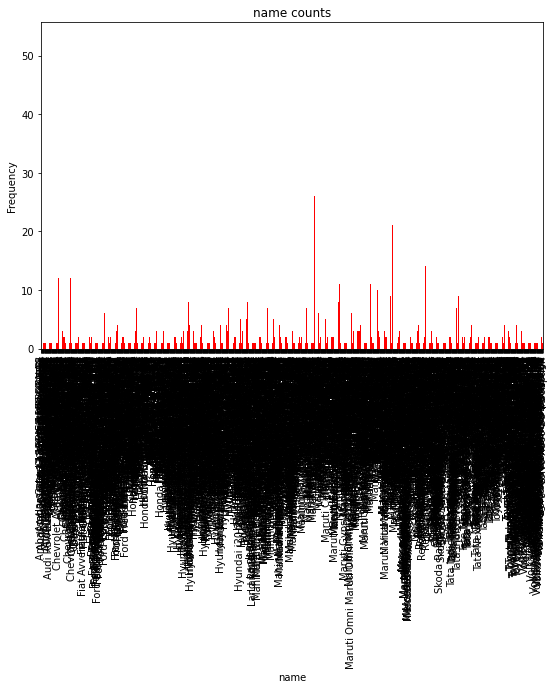

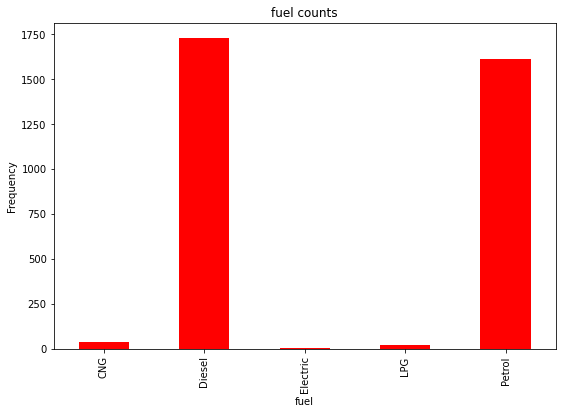

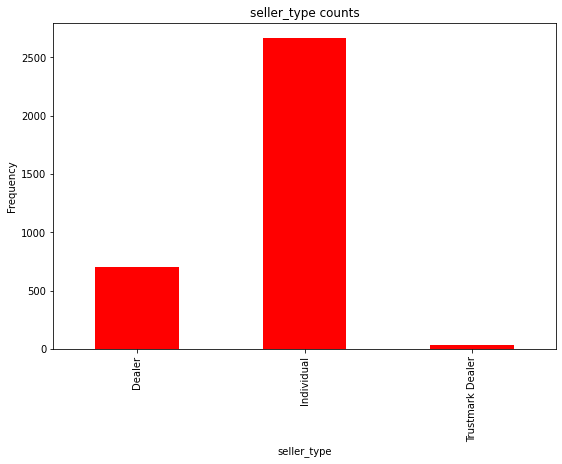

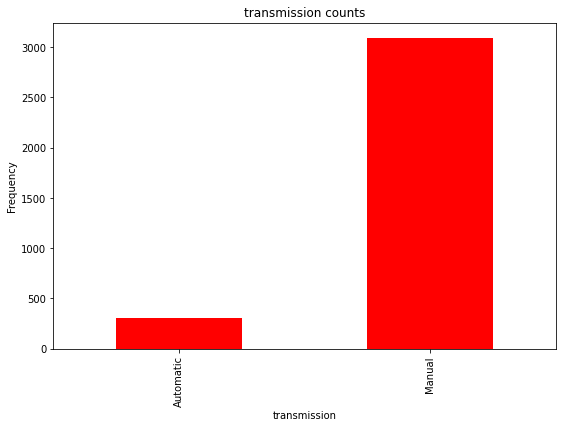

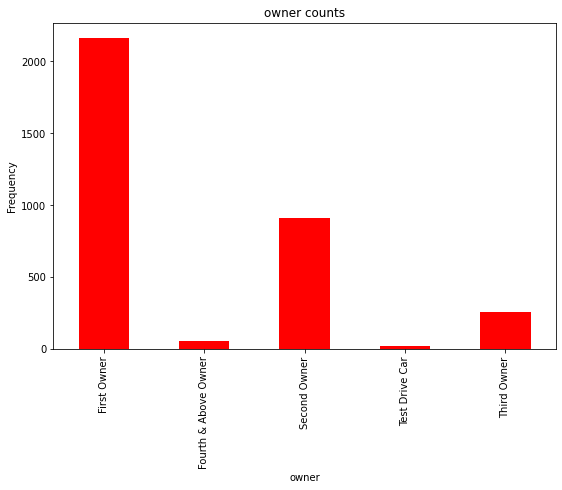

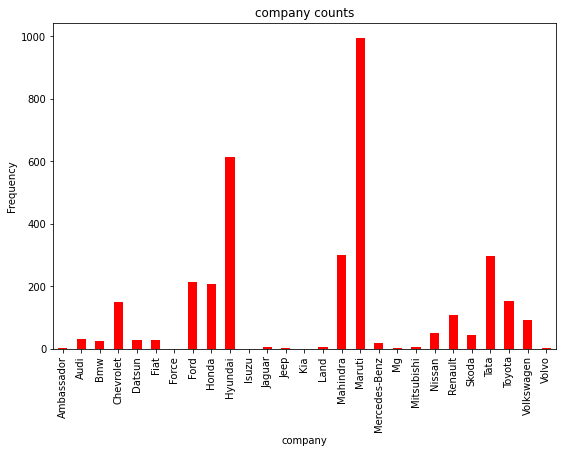

In [33]:
# plot a bar plot for each categorical feature count  
for col in categorical_features:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='red')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

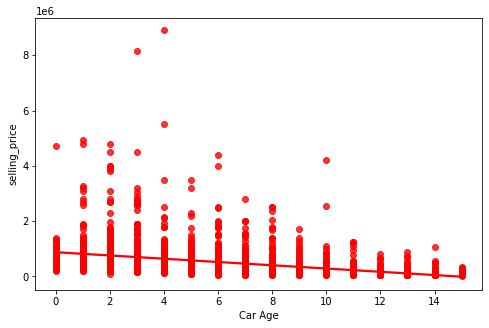

In [34]:
plt.figure(figsize=(8,5))
sns.regplot(x='Car Age',y='selling_price',data=dataset,color='red')

as car age increases selling price decreases

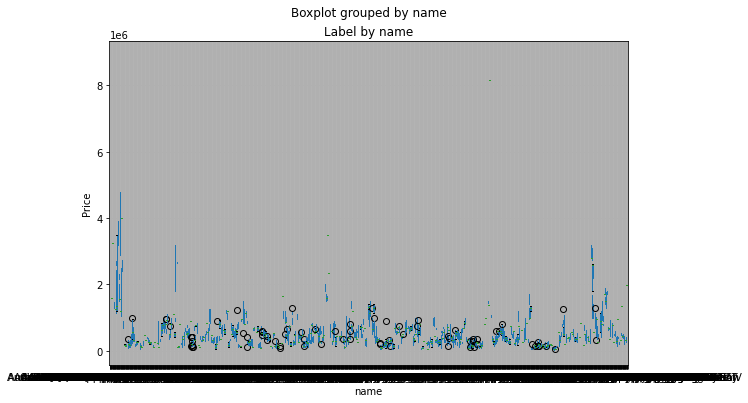

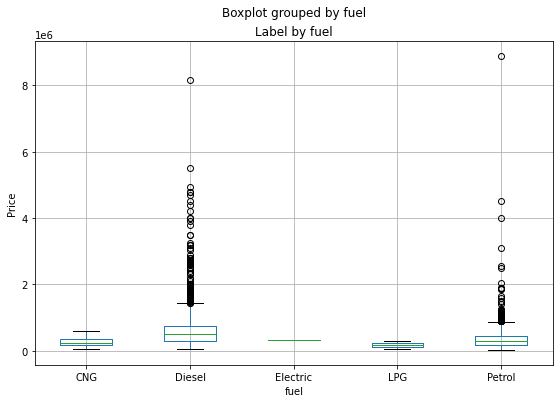

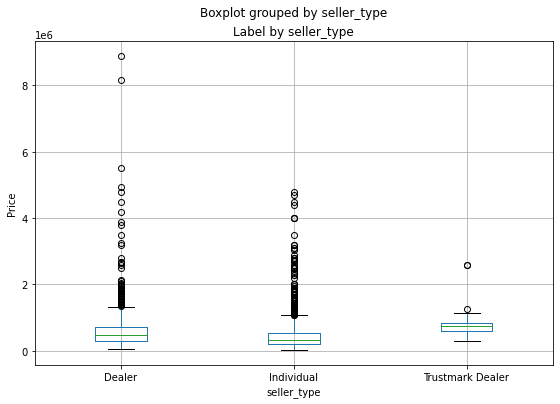

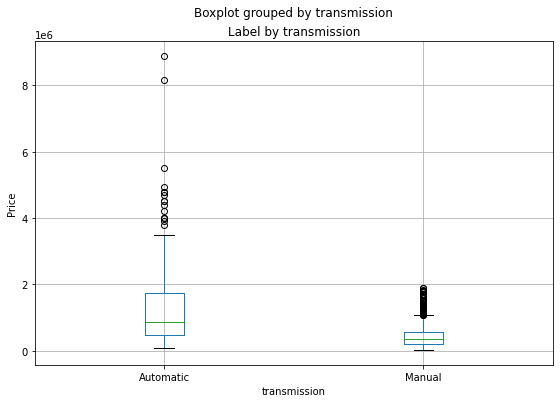

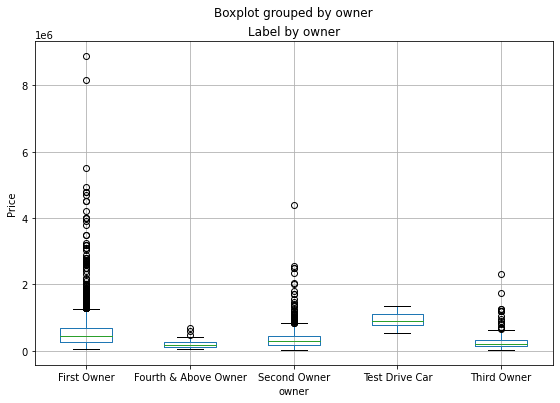

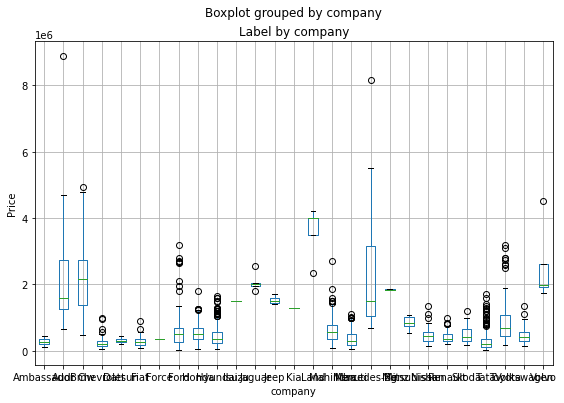

In [35]:
# plot a boxplot for the label by each categorical feature  
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(column = 'selling_price', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Price")
plt.show()

<Figure size 1440x432 with 0 Axes>

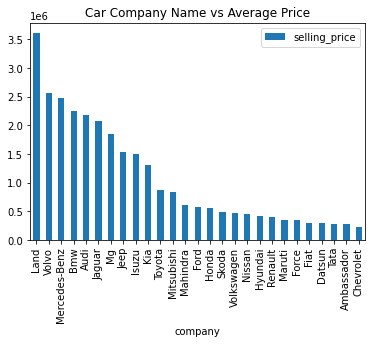

In [36]:
# Average selling price for each company
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(dataset.groupby(['company'])['selling_price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [37]:
df_autox.rename(columns={'selling_price':'Average_Selling_Price'},inplace=True)

In [38]:
dataset = dataset.merge(df_autox,on = 'company',how = 'left')

In [68]:
dataset['Company_Category'] = dataset['Average_Selling_Price'].apply(lambda x : 0 if x < 400000 else (1 if 400000 <= x < 700000 else 2))

In [69]:
dataset["company_cat"].value_counts()

1    1636
0    1504
2     255
Name: company_cat, dtype: int64

In [70]:
dataset.head()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Car Age,company,Average_Selling_Price,company_cat,Company_Category
0,0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13,Maruti,350566.930514,0,0
1,1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13,Maruti,350566.930514,0,0
2,2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8,Hyundai,423908.747557,1,1
3,3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3,Datsun,296551.655172,0,0
4,4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6,Honda,557067.584541,1,1


# Data Preparation

In [71]:
dataset.shape

(3395, 14)

In [72]:
dataset_copy =dataset.copy()

In [73]:
dataset_copy.shape

(3395, 14)

## **Feature Engineering**

---
Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.




We shall convert categorical features to numeric type...


In [74]:
### Data encoding
#label encoding
encoders_nums = {
                 "owner":{"Test Drive Car":4,"First Owner":0,"Second Owner":1,"Third Owner":2,"Fourth & Above Owner":3},
                 }

dataset_copy = dataset_copy.replace(encoders_nums)

In [75]:
# One hot encoding
dataset_copy = pd.get_dummies(dataset_copy, columns=["fuel"], prefix=["Fuel_Type"])
dataset_copy = pd.get_dummies(dataset_copy, columns=["seller_type",'transmission'],prefix=["Seller_Type","Transmission"])

In [76]:
dataset_copy.head()

,index,name,year,selling_price,km_driven,owner,Car Age,company,Average_Selling_Price,company_cat,Company_Category,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Automatic,Transmission_Manual
0,0,Maruti 800 AC,2007,60000,70000,0,13,Maruti,350566.930514,0,0,0,0,0,0,1,0,1,0,0,1
1,1,Maruti Wagon R LXI Minor,2007,135000,50000,0,13,Maruti,350566.930514,0,0,0,0,0,0,1,0,1,0,0,1
2,2,Hyundai Verna 1.6 SX,2012,600000,100000,0,8,Hyundai,423908.747557,1,1,0,1,0,0,0,0,1,0,0,1
3,3,Datsun RediGO T Option,2017,250000,46000,0,3,Datsun,296551.655172,0,0,0,0,0,0,1,0,1,0,0,1
4,4,Honda Amaze VX i-DTEC,2014,450000,141000,1,6,Honda,557067.584541,1,1,0,1,0,0,0,0,1,0,0,1


In [77]:
dataset_copy.drop(['index'], axis = 1, inplace = True)

With the help of one  hot coding

*   Fuel type attribute  is divided into 5 new attributes.
*   Transmission attribute is divided into 2 new attributes.
*   Seller_Type attribute is is divided into 2 new attributes.

In [78]:
dataset_copy.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'owner', 'Car Age',
       'company', 'Average_Selling_Price', 'company_cat', 'Company_Category',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Seller_Type_Dealer',
       'Seller_Type_Individual', 'Seller_Type_Trustmark Dealer',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

In [79]:
features = numerical_features.copy()

In [80]:
features.extend(['owner','Company_Category','Average_Selling_Price', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Seller_Type_Trustmark Dealer', 'Transmission_Automatic',
       'Transmission_Manual'])

In [81]:
features

['km_driven',
 'Car Age',
 'owner',
 'Company_Category',
 'Average_Selling_Price',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Electric',
 'Fuel_Type_LPG',
 'Fuel_Type_Petrol',
 'Seller_Type_Dealer',
 'Seller_Type_Individual',
 'Seller_Type_Trustmark Dealer',
 'Transmission_Automatic',
 'Transmission_Manual']

In [82]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = dataset_copy[features].apply(zscore)

In [84]:
y = np.log10(dataset['selling_price'])

# **Implementing Linear Regression**




In [85]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(2716, 15)
(679, 15)


In [87]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [88]:
reg.score(X_train,y_train)

0.7460054511255816

In [89]:
reg.coef_

array([-1.74923197e-02, -1.87982749e-01, -1.43158144e-02,  5.92765457e-02,
        8.14184583e-02,  2.02503772e+11,  9.75070686e+11,  2.43929682e+10,
        1.52923453e+11,  9.73891685e+11, -9.91315193e+10, -1.00818300e+11,
       -2.40402612e+10, -8.09440232e+10, -8.09440232e+10])

In [90]:
y_pred = reg.predict(X_test)

## Regression Evaluation

In [93]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 62036179046.59366
RMSE : 249070.63063836662


In [94]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7580137264526585
Adjusted R2 :  0.7525389238837141


Text(0, 0.5, 'Predicted selling price')

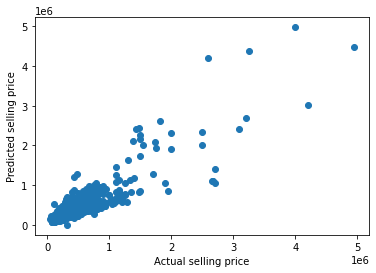

In [95]:
plt.scatter(10**(y_test), 10**(y_pred))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

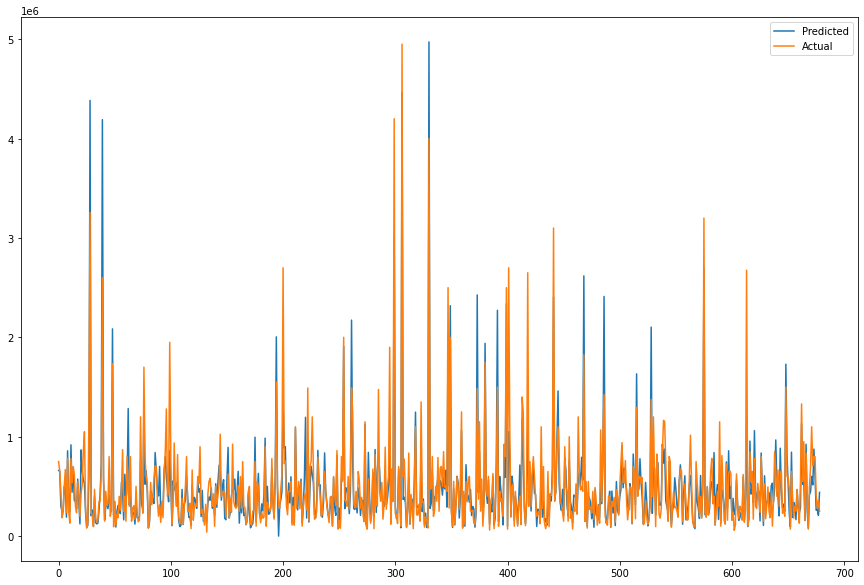

In [97]:
plt.figure(figsize=(15,10))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **Residuals:**

---
A residual is the vertical distance between a data point and the regression line. Each data point has one residual. They are positive if they are above the regression line and negative if they are below the regression line

Text(0.5, 0.98, 'Residual Analysis')

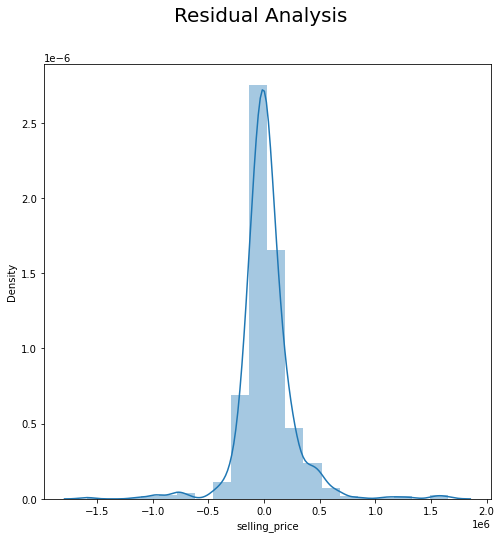

In [98]:
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

# **Linear regression model from statsmodels.api.**

In [103]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

In [104]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     851.2
Date:                Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:16:17   Log-Likelihood:                 1216.2
No. Observations:                3395   AIC:                            -2406.
Df Residuals:                    3382   BIC:                            -2327.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            5.5522      0.003   1909.251      0.000       5.546       5.558
km_driven                       -0.0155      0.004     -4.059      0.000      -0.023      -0.008
Car Age                         -0.1897      0.004    -51.399      0.000      -0.197      -0.182
owner                           -0.0135      0.003     -4.225      0.000      -0.020      -0.007
Company_Category                 0.0568      0.004     14.286      0.000       0.049       0.065
Average_Selling_Price            0.0797      0.004     18.199      0.000       0.071       0.088
Fuel_Type_CNG                   -0.0094      0.003     -3.283      0.001      -0.015      -0.004
Fuel_Type_Diesel                 0.0447      0.002     26.130      0.000       0.041       0.048
Fuel_Type_Electric              -0.0008      0.003     -0.258      0.797      -0.006       0.005
Fuel_Type_LPG                   -0.0090      0.003     -3.139      0.002      -0.015      -0.003
Fuel_Type_Petrol                -0.0413      0.002    -24.174      0.000      -0.045      -0.038
Seller_Type_Dealer               0.0073      0.002      4.609      0.000       0.004       0.010
Seller_Type_Individual          -0.0104      0.002     -6.804      0.000      -0.013      -0.007
Seller_Type_Trustmark Dealer     0.0135      0.003      4.739      0.000       0.008       0.019
Transmission_Automatic           0.0211      0.002     12.337      0.000       0.018       0.024
Transmission_Manual             -0.0211      0.002    -12.337      0.000      -0.024      -0.018
==============================================================================
Omnibus:                       49.481   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.208
Skew:                          -0.162   Prob(JB):                     2.09e-16
Kurtosis:                       3.637   Cond. No.                     1.01e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""